In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
X = tips[['total_bill','size']]
y = tips['tip']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10)

In [33]:
X_train.shape

(219, 2)

In [35]:
244*0.85

207.4

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model_train = model.fit(X_train,y_train)

In [39]:
model_train.coef_

array([0.09819666, 0.14067568])

In [40]:
model_train.score(X_train,y_train)

0.4668518036167114

In [41]:
model_train.intercept_

0.7026881417745918

In [43]:
y = (0.10018044*total_bill + 0.21945678*size + 0.42653508814656504)

In [42]:
total_bill = 2000
size = 4

In [44]:
y

201.66524220814654

In [19]:
pred = model_train.predict(X_test)

In [20]:
pred

array([1.90031263, 2.70883043, 2.97023979, 4.3238008 , 5.1122209 ,
       2.02654   , 2.96122355, 2.49538448, 2.79498561, 2.78496756,
       5.25347533, 0.95354583, 2.24894058, 1.87626933, 3.49524692,
       1.83519535, 2.51141335, 1.59175686, 2.46833576, 1.82217189,
       2.34110659, 5.62314117, 2.71684486, 4.92776568, 2.66068221,
       2.12772224, 2.13673848, 4.79164348, 2.2990308 , 4.02927029,
       2.66068221, 3.99314373, 4.79364708, 2.74683739, 4.4810841 ,
       1.86124226, 2.07061939, 2.40622388, 2.6576768 , 3.37102317,
       3.55629539, 4.89877495, 1.90131444, 2.52644041, 3.80887331,
       3.90698855, 1.89430181, 3.7167073 , 3.59655237, 3.14555556,
       2.20987021, 4.34389849, 4.21754792, 3.70969467, 2.85002325,
       3.26477029, 4.83672468, 2.81401989, 2.51341696, 3.39801028,
       2.89810986, 2.91814595, 2.20486119, 1.98446421, 3.74870344,
       1.82718091, 3.76767613, 6.56896777, 1.92635955, 4.67437075,
       3.99721255, 4.05619581, 5.32861066, 2.55048372])

In [22]:
import pandas as pd
df = pd.DataFrame({'Actual': y_test,"Predicted": pred, 'Error': y_test - pred})
df

,Actual,Predicted,Error
136,2.00,1.900313,0.099687
162,2.00,2.708830,-0.708830
98,3.00,2.970240,0.029760
219,3.09,4.323801,-1.233801
56,3.00,5.112221,-2.112221
...,...,...,...
238,4.67,4.674371,-0.004371
7,3.12,3.997213,-0.877213
173,3.18,4.056196,-0.876196
95,4.73,5.328611,-0.598611


In [23]:
df1 =  pd.DataFrame({'total_bill': [50,23,15], 'size': [1,2,4]})
df1


,total_bill,size
0,50,1
1,23,2
2,15,4


In [24]:
pred1 = model_train.predict(df1)

In [25]:
pred1

array([5.6550141 , 3.16959887, 2.80706886])

In [26]:
model_train.score(X_train,y_train)

0.48778446301222483

In [45]:
import numpy as np

In [46]:
tips['Log_total_bill'] = np.log(tips['total_bill'])

In [47]:
tips

,total_bill,tip,sex,smoker,day,time,size,Log_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,2.880321


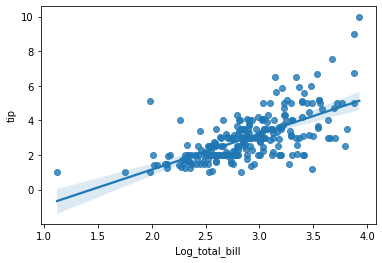

In [48]:
sns.regplot(x = 'Log_total_bill',y = 'tip',data = tips)

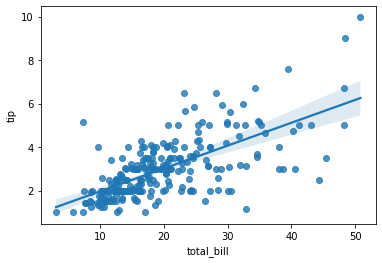

In [49]:
sns.regplot(x = 'total_bill',y = 'tip',data = tips)